Here are all the imports that we will use:
>- Numpy - for storing of arrays
>- Pandas - for dataframe manipulation
>- Sklearn - for preprocessing, splitting into train and test, training the model and predicting on new instances and performing metrics

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

Loading the csv file into dataframe

In [2]:
df = pd.read_csv('/Users/anilthapa/Downloads/dataset_NB.csv')

### Preprocessing 

In [3]:
df.head(10)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
5,i just had to jump in here as carbonara is on...,0
6,the scotsman NUMBER august NUMBER playboy want...,0
7,martin adamson wrote isn t it just basically a...,0
8,the scotsman thu NUMBER aug NUMBER meaningful ...,0
9,i have been trying to research via sa mirrors ...,0


Checking the dimension of the input features

In [4]:
df.shape

(3000, 2)

Getting general insights into the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


Checking if there exists any null values in the input features

In [6]:
df.isnull().any()

email     True
label    False
dtype: bool

Getting to know the null values. There exists only one 

In [7]:
df[df.isna().any(axis = 1)]

,email,label
2966,NaN,1


Dropping the null values, because there is only one. 

In [8]:
df.dropna(inplace=True)

A final check if we have dropped the null values or not.

In [9]:
df.isna().any()

email    False
label    False
dtype: bool

Checking whether the dataset is balanced or not. It seems that the dataset is imbalanced

In [10]:
df.label.value_counts()

label
0    2500
1     499
Name: count, dtype: int64

Now, we have a single input feature, which is a line of text. We cannot directly feed this input and train the model. Thus, we need some kind of preprocessing. Here we use CountVectorizer from sklearn.feature_extraction.text. The CountVectorizer converts the text data into numerical features vector representing the frequency of each word in a text.

In [11]:
vectorizer = CountVectorizer()

In [12]:
X_bow = vectorizer.fit_transform(df['email']).toarray()
y = df['label']

In [13]:
X_bow.shape

(2999, 34116)

### Train Test Split

Using train_test_split from sklearn.preprocessing to split our dataset for training and testing purposes. We have set training size of 80% here and a random state of 42.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, random_state=42, train_size=0.8)

### Train the model

Here we train our model. Our model is GaussianNB. We created an instance of Gaussian Naive Bayes Classifier. Then we fit our model. X_train is the training feature with a size of (2999, 34116) and y_train is the testing feature with size (2999,). After fitting our model, we predict on new unseen features using our trained classifier. 

In [15]:
gaussian_NB = GaussianNB()

In [16]:
gaussian_NB.fit(X_train, y_train)

GaussianNB()

In [17]:
y_predict = gaussian_NB.predict(X_test)

### Metrics

Computing the accuracy score:
> y_predict: the prediction by our trained classifier\
 y_test: the actual label from dataset

In [18]:
accuracy_score = accuracy_score(y_test, y_predict)
print('Accuracy Score: ',accuracy_score)

Accuracy Score:  0.9583333333333334


Computing the classification report. 
> The first column is precision score which tells us how accurate the model is when predicting the classes\
> The second column is recall score which tells us how well the model can capture the relevant instances of a particulat category\
> The third column is F1-score is a harmonic mean of precision score and Recall score\
> The fourth column is support which represents the count of true labels in dataset\
> The first row represents the 0 label and second row represents the 1 label\
> The macro avg represents the unweighted  average and weight avg represent the weighted average of the three metrics: precision, recall and F1-score

In [19]:
classification_report = classification_report(y_predict, y_test)
print('Classification Report:', classification_report)

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.97      0.98       507
           1       0.84      0.90      0.87        93

    accuracy                           0.96       600
   macro avg       0.91      0.94      0.92       600
weighted avg       0.96      0.96      0.96       600



Computing the confusion Matrix:
> Below is the confusion matrix
> 


Confusion Matrix: [[491  16]
 [  9  84]]


<Figure size 800x600 with 0 Axes>

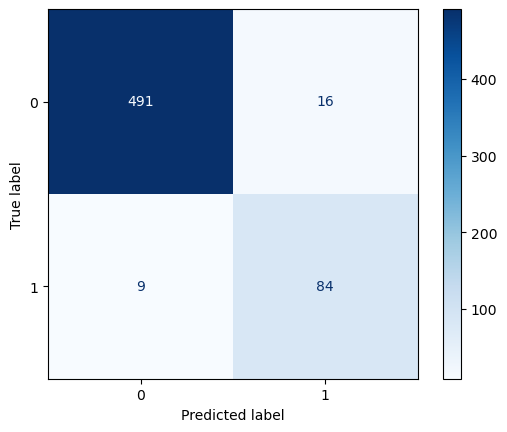

In [20]:
confusion_matrix = confusion_matrix(y_predict, y_test, labels=gaussian_NB.classes_)
print('Confusion Matrix:', confusion_matrix)

plt.figure(figsize = (8,6))
c_matrix = ConfusionMatrixDisplay(confusion_matrix, display_labels=gaussian_NB.classes_)
c_matrix.plot(cmap='Blues')
plt.show()

Here, we have a comprehensive evaluation tool, known as confusion matrix, to assess the effectiveness of classification model. It consists of a 2-by-2 grid, which each row represents the true labels and each column represents the predicted label. Within the matrix:
> (0, 0) - True Negative: These are the cases where the model correctly predicts the Negative class.\
> (0, 1)  - False Positive: These are the cases where the model predicted positive class, but the actual class was negative.\
> (1, 0) - False Negative:These are the cases where the model predicted negative class, but the actual class was positive.\
> (1, 1) - True Positive: These are the cases where the model correctly predicts the positive class.